In [1]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú, Ï†ÑÏ≤òÎ¶¨

In [4]:
# ÏΩîÎìúÎßµ Î°úÎìú
cert_map_df = pd.read_csv('/Users/eunzinri/Desktop/DMT/·Ñå·Ö°·ÑÄ·Öß·Ü®·Ñå·Ö≥·Üº·Ñè·Ö©·ÑÉ·Ö≥·ÑÜ·Ö¢·Ü∏.csv')
major_map_df = pd.read_csv('/Users/eunzinri/Desktop/DMT/·Ñå·Ö•·Ü´·ÑÄ·Ö©·Üº·Ñè·Ö©·ÑÉ·Ö≥·ÑÜ·Ö¢·Ü∏.csv')
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data2015 = pd.read_csv('/Users/eunzinri/Desktop/DMT/DM2015.csv')
data2016 = pd.read_csv('/Users/eunzinri/Desktop/DMT/DM2016.csv')
data2017 = pd.read_csv('/Users/eunzinri/Desktop/DMT/DM2017.csv')
data2018 = pd.read_csv('/Users/eunzinri/Desktop/DMT/DM2018.csv')
data2019 = pd.read_csv('/Users/eunzinri/Desktop/DMT/DM2019.csv')

In [6]:
# ÌïôÏ†ê ÌôòÏÇ∞ Ìï®Ïàò (ÌïôÏ†ê / ÎßåÏ†ê * 4.5)
def convert_gpa(row):
    gpa = row['Ï°∏ÏóÖ ÌèâÏ†ê']
    gpa_type = row['Ï°∏ÏóÖ ÌèâÏ†ê Ïú†Ìòï']
    
    if gpa_type == 3:
        return gpa
    elif gpa_type == 2:
        return (gpa / 4.3) * 4.5
    elif gpa_type == 1:
        return (gpa / 4.0) * 4.5
    else:
        return None 
        
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess(df) :

    #Ïù¥ÏßÑÎ≥ÄÏàò ÏÑ§Ï†ï
    binary_cols = [
        'ÏïåÎ∞î Ïó¨Î∂Ä', 'ÏßÅÏû•_ÏöîÍµ¨ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä', 'Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä', 'Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò', 'ÎåÄÌïôÏõêÍ≤ΩÌóò',
        'Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò','Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥','Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò', 'ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä', 'Í≥µÎ™®Ï†ÑÏàòÏÉÅ', 'ÎåÄÏô∏ÌôúÎèô', 'Î©¥Ï†ëÌõàÎ†®',
        'Ìù°Ïó∞Ïó¨Î∂Ä'
    ]

    # (ÏõêÎç∞Ïù¥ÌÑ∞)1,2 -> 1,0ÏúºÎ°ú Î≥ÄÍ≤Ω
    for col in binary_cols:
        if col in df.columns:
            df[col] = df[col].replace({2: 0})

    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    cols_to_fill_zero = ['Ïõî ÏÜåÎìù','Ìï©Í≤©Í≤ΩÌóò','Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä','Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä',
                         'Ìú¥ÌïôÌïôÍ∏∞Ïàò','Í≥µÎ™®Ï†ÑÏàòÏÉÅ','ÎåÄÏô∏ÌôúÎèô','Î©¥Ï†ëÌõàÎ†®',
                        'Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®']
    df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)
    df['ÏïåÎ∞î Ïó¨Î∂Ä'] = df['ÏïåÎ∞î Ïó¨Î∂Ä'].fillna(1)
    
    # Î≥ÄÏàòÎ≥Ñ Ï†ÅÏ†àÌïú Ï≤òÎ¶¨ (Ïù¥ÏÉÅÏπò/Í≤∞Ï∏°Ïπò Ï†úÍ±∞, Ïõ¨ÎßåÌïòÎ©¥ Ïù¥ÏßÑÏúºÎ°ú Î≥ÄÍ≤Ω)
    df['Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®'] = df['Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®'].apply(lambda x: 0 if x == -1 else x)
    df['Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä'] = df['ÌïôÍµêÏÜåÏû¨'].apply(lambda x: 0 if x != 1 else 1)
    df['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'] = df['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'].apply(lambda x: 1 if x in [4, 5, 6] else 0)
    df['Íµ∞Î≥µÎ¨¥Í≤ΩÌóò'] = df['Íµ∞Î≥µÎ¨¥Í≤ΩÌóò'].apply(lambda x: 1 if x in [2,3] else 0)
    
    # Íµ∞Ìú¥Ìïô Î≥¥Ï†ï
    df.loc[(df['Ìú¥ÌïôÌïôÍ∏∞Ïàò'] >2) & (df['Íµ∞Î≥µÎ¨¥Í≤ΩÌóò'] == 1), 'Ìú¥ÌïôÌïôÍ∏∞Ïàò'] -= 3
    
    # ÌïôÏ†ê ÌôòÏÇ∞(Ïä§ÏºÄÏùºÎßÅ)
    df['ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê'] = df.apply(convert_gpa, axis=1)
    
    # Ìï©Í≤©Ïó¨Î∂Ä(Ï¢ÖÏÜç)Î≥ÄÏàò Ï∂îÍ∞Ä 
    df['Ìï©Í≤©Ïó¨Î∂Ä'] = df['ÏïåÎ∞î Ïó¨Î∂Ä'].apply(lambda x: 0 if x == 1 else 1)
    df.loc[(df['Ìï©Í≤©Í≤ΩÌóò'] > 0), 'Ìï©Í≤©Ïó¨Î∂Ä'] = 1
    
    # Ïì∏Î™®ÏóÜÎäî Î≥ÄÏàò Ï†úÍ±∞
    df.drop(columns=['Ï°∏ÏóÖ ÌèâÏ†ê Ïú†Ìòï', 'Ï°∏ÏóÖ ÌèâÏ†ê', 'ÌïôÍµêÏÜåÏû¨'],inplace=True)

    # Í∞íÎì§Ïù¥ ÏΩîÎìúÎ°ú ÎêòÏñ¥ ÏûàÎäî ÏûêÍ≤©Ï¶ùÏùÑ ÌååÏïÖ ÌïòÍ∏∞ÏúÑÌï¥ ÌïúÍ∏ÄÌôî
    cert_map = dict(zip(cert_map_df['ÏΩîÎìú'], cert_map_df['ÏûêÍ≤©Ï¶ùÎ™Ö']))
    cert_cols=['ÏûêÍ≤©Ï¶ù_1','ÏûêÍ≤©Ï¶ù_2','ÏûêÍ≤©Ï¶ù_3']
    for col in cert_cols:
        df[col] = df[col].map(cert_map)

    #Ïù¥ÏßÑÎ≥ÄÏàò Î∂àÎ¶∞ÏúºÎ°ú Î≥ÄÍ≤Ω
    df[binary_cols] = df[binary_cols].astype(bool)

    #Ïõî ÏÜåÎìù Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
    df = df[df['Ïõî ÏÜåÎìù'] < 2000]
    return df

In [8]:
# Îç∞Ïù¥ÌÑ∞Îì§ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ÅÏö©
data_list = [data2015, data2016, data2017, data2018, data2019]
df2015, df2016, df2017, df2018, df2019 = [preprocess(d) for d in data_list]

In [9]:
# ÏûêÍ≤©Ï¶ù ÏΩîÎìú->ÏûêÍ≤©Ï¶ùÎ™Ö (2015,2016ÍπåÏßÄÎßå ÏΩîÎìúÎ°ú ÎêòÏñ¥ÏûàÏùå)
major_map = dict(zip(major_map_df['ÏΩîÎìú'], major_map_df['Ï†ÑÍ≥µÎ™Ö']))
df2015['Ï†ÑÍ≥µ'] = df2015['Ï†ÑÍ≥µ'].map(major_map)
df2016['Ï†ÑÍ≥µ'] = df2016['Ï†ÑÍ≥µ'].map(major_map)

/var/folders/d2/9rzglf1n68j37h1zk5c5zvkw0000gn/T/ipykernel_14425/2712900240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015['Ï†ÑÍ≥µ'] = df2015['Ï†ÑÍ≥µ'].map(major_map)
/var/folders/d2/9rzglf1n68j37h1zk5c5zvkw0000gn/T/ipykernel_14425/2712900240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016['Ï†ÑÍ≥µ'] = df2016['Ï†ÑÍ≥µ'].map(major_map)


In [12]:
# Ï≤òÎ¶¨ Í≤∞Í≥º ÌôïÏù∏
df2015.columns

Index(['Ï†ÑÍ≥µ', 'Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥', 'ÏïåÎ∞î Ïó¨Î∂Ä', 'Ïõî ÏÜåÎìù', 'ÏßÅÏû•_ÎßåÏ°±ÎèÑ', 'ÏßÅÏû•_Ï†ÑÍ≥µÏùºÏπòÏ†ïÎèÑ', 'ÏßÅÏû•_ÏöîÍµ¨ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä',
       'Ìï©Í≤©Í≤ΩÌóò', 'Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î≥µÏàòÏ†ÑÍ≥µÎ™Ö', 'Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î∂ÄÏ†ÑÍ≥µÎ™Ö', 'Íµ∞Î≥µÎ¨¥Í≤ΩÌóò', 'Ìú¥ÌïôÌïôÍ∏∞Ïàò', 'Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò',
       'ÎåÄÌïôÏõêÍ≤ΩÌóò', 'Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò', 'Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò', 'ÌÜ†ÏùµÏ†êÏàò', 'Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥', 'ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä', 'ÏûêÍ≤©Ï¶ù_1',
       'ÏûêÍ≤©Ï¶ù_2', 'ÏûêÍ≤©Ï¶ù_3', 'Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò', 'Í≥µÎ™®Ï†ÑÏàòÏÉÅ', 'ÎåÄÏô∏ÌôúÎèô', 'Î©¥Ï†ëÌõàÎ†®', 'Ï§ëÏöîÎèÑ_Í∑ºÎ°úÏÜåÎìù',
       'Ï§ëÏöîÎèÑ_Ìù•ÎØ∏', 'Ï§ëÏöîÎèÑ_Ï†ÑÍ≥µÍ¥ÄÎ†®ÏÑ±', 'Ï§ëÏöîÎèÑ_Í∞úÏù∏Î∞úÏ†ÑÍ∞ÄÎä•ÏÑ±', 'Ï§ëÏöîÎèÑ_ÏßÅÏóÖÏûêÏ≤¥Ï†ÑÎßù', 'Ï§ëÏöîÎèÑ_ÏßÅÏû•ÏïàÏ†ïÏÑ±',
       'Ï§ëÏöîÎèÑ_Í∑ºÎ¨¥ÌôòÍ≤Ω', 'Ï§ëÏöîÎèÑ_Î≥µÎ¶¨ÌõÑÏÉù', 'Ï§ëÏöîÎèÑ_ÌöåÏÇ¨Í∑úÎ™®', 'Ï§ëÏöîÎèÑ_Ï∂úÌá¥Í∑ºÍ±∞Î¶¨', 'Ï§ëÏöîÎèÑ_ÏÇ¨ÌöåÏ†ÅÌèâÌåê',
       'ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ', 'Ìù°Ïó∞Ïó¨Î∂Ä', 'ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ', 'ÏÇ∂Ïùò ÎßåÏ°±ÎèÑ', 'Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®',

In [14]:
# ÏÇ∞Í≥µ ÌïôÏÉùÎì§Îßå Ï∂îÏ∂ú
df_list = [df2015, df2016, df2017, df2018, df2019]
ie2015, ie2016, ie2017, ie2018, ie2019 = [df[df['Ï†ÑÍ≥µ'] == 'ÏÇ∞ÏóÖÍ≥µÌïô'] for df in df_list]

In [16]:
len(ie2015),len(ie2016),len(ie2017),len(ie2018),len(ie2019)

(154, 160, 147, 193, 200)

In [18]:
# Ïó∞ÎèÑÎ≥Ñ ÏûêÍ≤©Ï¶ùÎ™Ö ÌÜµÏùº
cols = ['ÏûêÍ≤©Ï¶ù_1', 'ÏûêÍ≤©Ï¶ù_2', 'ÏûêÍ≤©Ï¶ù_3']

for col in cols:
    ie2015[col] = ie2015[col].replace('Ïª¥ÌôúÏö©Ïã§Î¨¥Îä•Î†•', 'Ïª¥Ìì®ÌÑ∞ÌôúÏö©Îä•Î†•')
    ie2015[col] = ie2015[col].replace('ÌíàÏßàÍ∏∞ÏÇ¨', 'ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨')
    ie2015[col] = ie2015[col].replace('ÏõåÎìúÏã§Î¨¥Îä•Î†•', 'ÏõåÎìúÌîÑÎ°úÏÑ∏ÏÑú')
    ie2015[col] = ie2015[col].replace('ÏõåÎìú', 'ÏõåÎìúÌîÑÎ°úÏÑ∏ÏÑú')
    
    ie2016[col] = ie2016[col].replace('Ïª¥ÌôúÏö©Ïã§Î¨¥Îä•Î†•', 'Ïª¥Ìì®ÌÑ∞ÌôúÏö©Îä•Î†•')
    ie2016[col] = ie2016[col].replace('ÏõåÎìúÏã§Î¨¥Îä•Î†•', 'ÏõåÎìúÌîÑÎ°úÏÑ∏ÏÑú')

/var/folders/d2/9rzglf1n68j37h1zk5c5zvkw0000gn/T/ipykernel_14425/3582520537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ie2015[col] = ie2015[col].replace('Ïª¥ÌôúÏö©Ïã§Î¨¥Îä•Î†•', 'Ïª¥Ìì®ÌÑ∞ÌôúÏö©Îä•Î†•')
/var/folders/d2/9rzglf1n68j37h1zk5c5zvkw0000gn/T/ipykernel_14425/3582520537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ie2015[col] = ie2015[col].replace('ÌíàÏßàÍ∏∞ÏÇ¨', 'ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨')
/var/folders/d2/9rzglf1n68j37h1zk5c5zvkw0000gn/T/ipykernel_14425/3582520537.py:7: SettingWithCopyWar

In [20]:
# Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÎ°ú ÌÜµÌï©
ie_data = pd.concat([ie2015, ie2016, ie2017, ie2018, ie2019], ignore_index=True)

In [22]:
# ÏûêÍ≤©Ï¶ù Î≥ÄÏàò Ï∂îÍ∞ÄÎ•º ÏúÑÌïú Ìï®Ïàò (Ïù¥ÏßÑÎ≥ÄÏàò)

def oneHotCert(df, top_n=5):
    # ÏûêÍ≤©Ï¶ù Ïª¨Îüº Î™©Î°ù Í≥†Ï†ï
    cert_cols = ['ÏûêÍ≤©Ï¶ù_1', 'ÏûêÍ≤©Ï¶ù_2', 'ÏûêÍ≤©Ï¶ù_3']

    # 1. ÏûêÍ≤©Ï¶ù ÌÜµÌï©
    df['ÏûêÍ≤©Ï¶ù_ÌÜµÌï©'] = df[cert_cols].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

    # 2. ÏÉÅÏúÑ NÍ∞ú ÏûêÍ≤©Ï¶ù Ï∂îÏ∂ú
    all_certs = pd.concat([df[col] for col in cert_cols])
    top_certs = all_certs.dropna().value_counts().head(top_n).index.tolist()
    print(top_certs)

    # 3. Ïù¥ÏßÑ Î≥ÄÏàò ÏÉùÏÑ±
    for cert in top_certs:
        df[f'ÏûêÍ≤©Ï¶ù_{cert}'] = df['ÏûêÍ≤©Ï¶ù_ÌÜµÌï©'].apply(lambda x: 1 if cert in x else 0)
        
    df.drop(columns=['ÏûêÍ≤©Ï¶ù_1', 'ÏûêÍ≤©Ï¶ù_2', 'ÏûêÍ≤©Ï¶ù_3','ÏûêÍ≤©Ï¶ù_ÌÜµÌï©'],inplace=True)

    return df

In [24]:
ie_data = oneHotCert(ie_data)

['ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨', 'Ï†ïÎ≥¥Ï≤òÎ¶¨Í∏∞ÏÇ¨', 'Ïª¥Ìì®ÌÑ∞ÌôúÏö©Îä•Î†•', 'ÏÇ∞ÏóÖÏïàÏ†ÑÍ∏∞ÏÇ¨', 'Ïú†ÌÜµÍ¥ÄÎ¶¨ÏÇ¨']


In [26]:
# ÏûêÍ≤©Ï¶ù Î≥ÄÏàò Ï∂îÍ∞Ä ÌôïÏù∏
ie_data.columns

Index(['Ï†ÑÍ≥µ', 'Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥', 'ÏïåÎ∞î Ïó¨Î∂Ä', 'Ïõî ÏÜåÎìù', 'ÏßÅÏû•_ÎßåÏ°±ÎèÑ', 'ÏßÅÏû•_Ï†ÑÍ≥µÏùºÏπòÏ†ïÎèÑ', 'ÏßÅÏû•_ÏöîÍµ¨ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä',
       'Ìï©Í≤©Í≤ΩÌóò', 'Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î≥µÏàòÏ†ÑÍ≥µÎ™Ö', 'Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î∂ÄÏ†ÑÍ≥µÎ™Ö', 'Íµ∞Î≥µÎ¨¥Í≤ΩÌóò', 'Ìú¥ÌïôÌïôÍ∏∞Ïàò', 'Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò',
       'ÎåÄÌïôÏõêÍ≤ΩÌóò', 'Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò', 'Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò', 'ÌÜ†ÏùµÏ†êÏàò', 'Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥', 'ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä', 'Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò',
       'Í≥µÎ™®Ï†ÑÏàòÏÉÅ', 'ÎåÄÏô∏ÌôúÎèô', 'Î©¥Ï†ëÌõàÎ†®', 'Ï§ëÏöîÎèÑ_Í∑ºÎ°úÏÜåÎìù', 'Ï§ëÏöîÎèÑ_Ìù•ÎØ∏', 'Ï§ëÏöîÎèÑ_Ï†ÑÍ≥µÍ¥ÄÎ†®ÏÑ±',
       'Ï§ëÏöîÎèÑ_Í∞úÏù∏Î∞úÏ†ÑÍ∞ÄÎä•ÏÑ±', 'Ï§ëÏöîÎèÑ_ÏßÅÏóÖÏûêÏ≤¥Ï†ÑÎßù', 'Ï§ëÏöîÎèÑ_ÏßÅÏû•ÏïàÏ†ïÏÑ±', 'Ï§ëÏöîÎèÑ_Í∑ºÎ¨¥ÌôòÍ≤Ω', 'Ï§ëÏöîÎèÑ_Î≥µÎ¶¨ÌõÑÏÉù',
       'Ï§ëÏöîÎèÑ_ÌöåÏÇ¨Í∑úÎ™®', 'Ï§ëÏöîÎèÑ_Ï∂úÌá¥Í∑ºÍ±∞Î¶¨', 'Ï§ëÏöîÎèÑ_ÏÇ¨ÌöåÏ†ÅÌèâÌåê', 'ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ', 'Ìù°Ïó∞Ïó¨Î∂Ä', 'ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ',
       'ÏÇ∂Ïùò ÎßåÏ°±ÎèÑ', 'Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®', 'ÏõîÌèâÍ∑†ÏÉùÌôúÎπÑ', 'ÌòÑÏû¨ Í±¥Í∞ïÏÉÅÌÉú',

In [28]:
# Ïì∏Î™®ÏóÜÎäî(Í≤∞Ï∏°ÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÍ±∞ÎÇò, Î∂ÑÏÑùÏóê ÌïÑÏöîÏóÜÎäî)Î≥ÄÏàò Ï†úÍ±∞
ie_data=ie_data.drop(columns=['Ï†ÑÍ≥µ','Ìï©Í≤©Í≤ΩÌóò','Î≥µÏàòÏ†ÑÍ≥µÎ™Ö','Î∂ÄÏ†ÑÍ≥µÎ™Ö','ÏõîÌèâÍ∑†ÏÉùÌôúÎπÑ','ÌÜ†ÏùµÏ†êÏàò'])

In [30]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
ie_data.isna().sum()

Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥           0
ÏïåÎ∞î Ïó¨Î∂Ä            0
Ïõî ÏÜåÎìù             0
ÏßÅÏû•_ÎßåÏ°±ÎèÑ         206
ÏßÅÏû•_Ï†ÑÍ≥µÏùºÏπòÏ†ïÎèÑ      206
ÏßÅÏû•_ÏöîÍµ¨ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä       0
Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä           0
Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä            0
Íµ∞Î≥µÎ¨¥Í≤ΩÌóò            0
Ìú¥ÌïôÌïôÍ∏∞Ïàò            0
Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò           0
ÎåÄÌïôÏõêÍ≤ΩÌóò            0
Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò          0
Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò           0
Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥           0
ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä            0
Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò           0
Í≥µÎ™®Ï†ÑÏàòÏÉÅ            0
ÎåÄÏô∏ÌôúÎèô             0
Î©¥Ï†ëÌõàÎ†®             0
Ï§ëÏöîÎèÑ_Í∑ºÎ°úÏÜåÎìù         0
Ï§ëÏöîÎèÑ_Ìù•ÎØ∏           0
Ï§ëÏöîÎèÑ_Ï†ÑÍ≥µÍ¥ÄÎ†®ÏÑ±        0
Ï§ëÏöîÎèÑ_Í∞úÏù∏Î∞úÏ†ÑÍ∞ÄÎä•ÏÑ±      0
Ï§ëÏöîÎèÑ_ÏßÅÏóÖÏûêÏ≤¥Ï†ÑÎßù       0
Ï§ëÏöîÎèÑ_ÏßÅÏû•ÏïàÏ†ïÏÑ±        0
Ï§ëÏöîÎèÑ_Í∑ºÎ¨¥ÌôòÍ≤Ω         0
Ï§ëÏöîÎèÑ_Î≥µÎ¶¨ÌõÑÏÉù         0
Ï§ëÏöîÎèÑ_ÌöåÏÇ¨Í∑úÎ™®         0
Ï§ëÏöîÎèÑ_Ï∂úÌá¥Í∑ºÍ±∞Î¶¨        0
Ï§ëÏöîÎèÑ_ÏÇ¨ÌöåÏ†ÅÌèâÌåê        0
ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞

In [32]:
# Ï°∏ÏóÖÌèâÏ†ê Í≤∞Ï∏°ÏπòÎ•º ÌèâÍ∑†ÏúºÎ°ú Î≥¥Í∞Ñ
ie_data['ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê']=ie_data['ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê'].fillna(ie_data['ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê'].mean())

# Ï°∏ÏóÖ ÌõÑ Ï†ïÍ∑úÏßÅ Ìï©Í≤©Ïó¨Î∂Ä ÏòàÏ∏°

## EDA

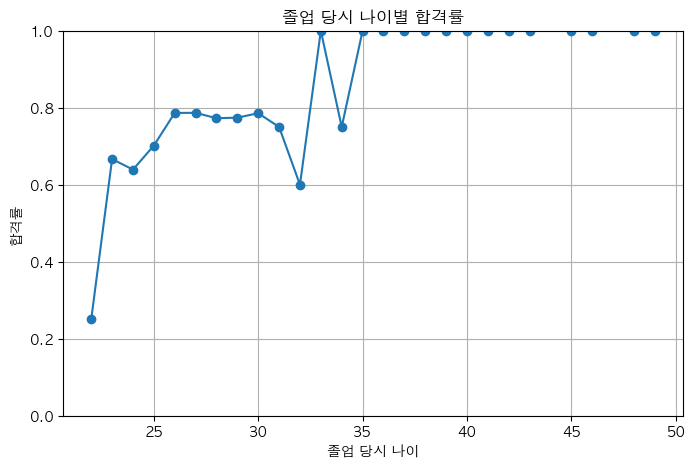

In [56]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')  # Îß•ÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

# ÎÇòÏù¥Î≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•†
age_mean = ie_data.groupby('Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(age_mean['Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥'], age_mean['Ìï©Í≤©Ïó¨Î∂Ä'], marker='o')
plt.xlabel('Ï°∏ÏóÖ ÎãπÏãú ÎÇòÏù¥')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('Ï°∏ÏóÖ ÎãπÏãú ÎÇòÏù¥Î≥Ñ Ìï©Í≤©Î•†')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

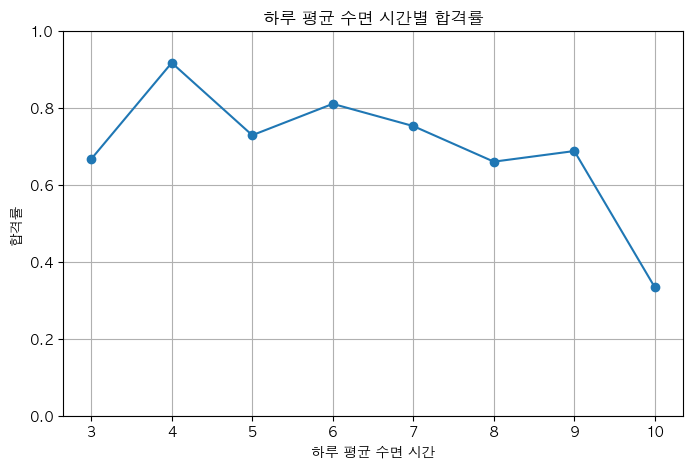

In [58]:
# ÎÇòÏù¥Î≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•†
age_mean = ie_data.groupby('ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (ÏàòÎ©¥ÏãúÍ∞ÑÏù¥ 1ÏãúÍ∞ÑÏù∏ ÏÇ¨ÎûåÏùÄ Ìïú Î™ÖÎøê)
age_mean = age_mean[age_mean['ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ'] != 1]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(age_mean['ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ'], age_mean['Ìï©Í≤©Ïó¨Î∂Ä'], marker='o')
plt.xlabel('ÌïòÎ£® ÌèâÍ∑† ÏàòÎ©¥ ÏãúÍ∞Ñ')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('ÌïòÎ£® ÌèâÍ∑† ÏàòÎ©¥ ÏãúÍ∞ÑÎ≥Ñ Ìï©Í≤©Î•†')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

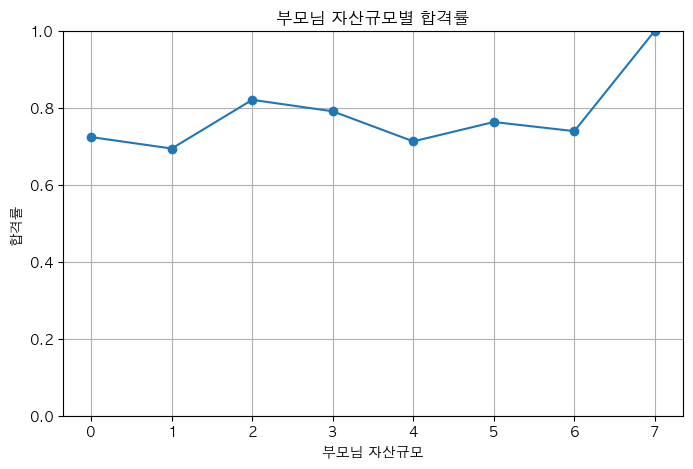

In [60]:
# ÎÇòÏù¥Î≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•†
age_mean = ie_data.groupby('Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(age_mean['Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®'], age_mean['Ìï©Í≤©Ïó¨Î∂Ä'], marker='o')
plt.xlabel('Î∂ÄÎ™®Îãò ÏûêÏÇ∞Í∑úÎ™®')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('Î∂ÄÎ™®Îãò ÏûêÏÇ∞Í∑úÎ™®Î≥Ñ Ìï©Í≤©Î•†')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

/var/folders/d2/9rzglf1n68j37h1zk5c5zvkw0000gn/T/ipykernel_14425/4172246101.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_bin_mean = iee.groupby('ÌèâÏ†êÍµ¨Í∞Ñ')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()


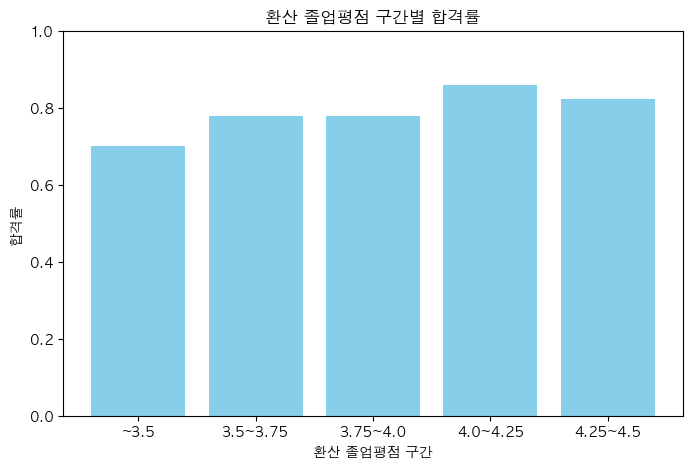

In [62]:
# ÌèâÏ†ê Íµ¨Í∞Ñ ÏÑ§Ï†ï
bins = [0, 3.5, 3.75, 4.0, 4.25, 4.5]
labels = ['~3.5', '3.5~3.75', '3.75~4.0', '4.0~4.25', '4.25~4.5']
iee=ie_data.copy()
iee['ÌèâÏ†êÍµ¨Í∞Ñ'] = pd.cut(iee['ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê'], bins=bins, labels=labels)

# Íµ¨Í∞ÑÎ≥Ñ Ìï©Í≤©Î•†
score_bin_mean = iee.groupby('ÌèâÏ†êÍµ¨Í∞Ñ')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.bar(score_bin_mean['ÌèâÏ†êÍµ¨Í∞Ñ'], score_bin_mean['Ìï©Í≤©Ïó¨Î∂Ä'], color='skyblue')
plt.xlabel('ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê Íµ¨Í∞Ñ')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê Íµ¨Í∞ÑÎ≥Ñ Ìï©Í≤©Î•†')
plt.ylim(0, 1)
plt.show()

In [64]:
iee['ÌèâÏ†êÍµ¨Í∞Ñ'].value_counts()

ÌèâÏ†êÍµ¨Í∞Ñ
~3.5        373
3.75~4.0    193
3.5~3.75    172
4.0~4.25     71
4.25~4.5     45
Name: count, dtype: int64

In [66]:
# Íµ¨Í∞ÑÎ≥ÑÎ°ú Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä ÎπÑÏú® Í≥ÑÏÇ∞
for grade_bin in ['4.0~4.25', '4.25~4.5']:
    subset = iee[iee['ÌèâÏ†êÍµ¨Í∞Ñ'] == grade_bin]
    ratio = subset['Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä'].value_counts(normalize=True)
    print(f"ÌèâÏ†êÍµ¨Í∞Ñ: {grade_bin}")
    print(ratio)
    print()

ÌèâÏ†êÍµ¨Í∞Ñ: 4.0~4.25
Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä
0    0.535211
1    0.464789
Name: proportion, dtype: float64

ÌèâÏ†êÍµ¨Í∞Ñ: 4.25~4.5
Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä
0    0.777778
1    0.222222
Name: proportion, dtype: float64



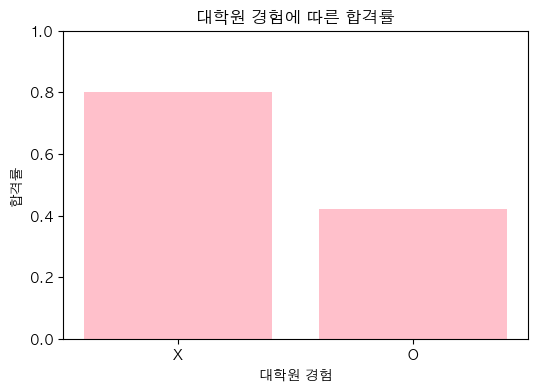

In [68]:
# Ìù°Ïó∞Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•† Í≥ÑÏÇ∞
aca_mean = ie_data.groupby('ÎåÄÌïôÏõêÍ≤ΩÌóò')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(aca_mean['ÎåÄÌïôÏõêÍ≤ΩÌóò'], aca_mean['Ìï©Í≤©Ïó¨Î∂Ä'], color='pink')
plt.xticks([0, 1], ['X', 'O'])
plt.xlabel('ÎåÄÌïôÏõê Í≤ΩÌóò')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('ÎåÄÌïôÏõê Í≤ΩÌóòÏóê Îî∞Î•∏ Ìï©Í≤©Î•†')
plt.ylim(0, 1)
plt.show()

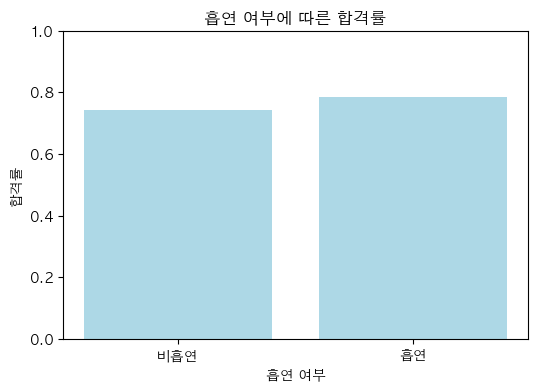

In [70]:
# Ìù°Ïó∞Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•† Í≥ÑÏÇ∞
smoke_mean = ie_data.groupby('Ìù°Ïó∞Ïó¨Î∂Ä')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(smoke_mean['Ìù°Ïó∞Ïó¨Î∂Ä'], smoke_mean['Ìï©Í≤©Ïó¨Î∂Ä'], color='lightblue')
plt.xticks([0, 1], ['ÎπÑÌù°Ïó∞', 'Ìù°Ïó∞'])
plt.xlabel('Ìù°Ïó∞ Ïó¨Î∂Ä')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('Ìù°Ïó∞ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ìï©Í≤©Î•†')
plt.ylim(0, 1)
plt.show()

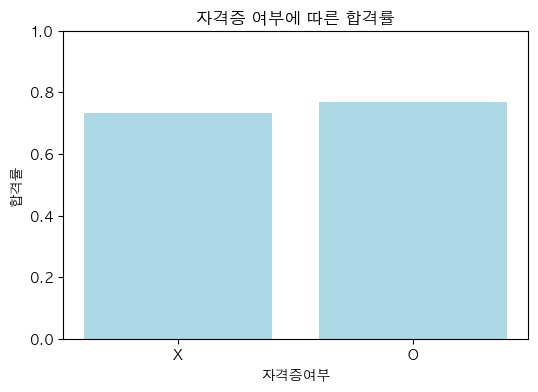

In [72]:
# Ìù°Ïó∞Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•† Í≥ÑÏÇ∞
in_mean = ie_data.groupby('ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(in_mean['ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä'], in_mean['Ìï©Í≤©Ïó¨Î∂Ä'], color='lightblue')
plt.xticks([0, 1], ['X', 'O'])
plt.xlabel('ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('ÏûêÍ≤©Ï¶ù Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ìï©Í≤©Î•†')
plt.ylim(0, 1)
plt.show()

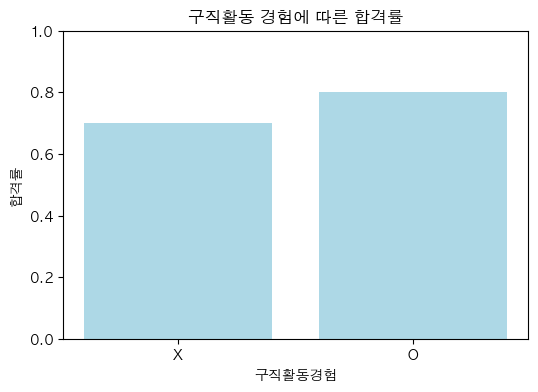

In [74]:
# Ìù°Ïó∞Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•† Í≥ÑÏÇ∞
in_mean = ie_data.groupby('Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(in_mean['Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò'], in_mean['Ìï©Í≤©Ïó¨Î∂Ä'], color='lightblue')
plt.xticks([0, 1], ['X', 'O'])
plt.xlabel('Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò')
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('Íµ¨ÏßÅÌôúÎèô Í≤ΩÌóòÏóê Îî∞Î•∏ Ìï©Í≤©Î•†')
plt.ylim(0, 1)
plt.show()

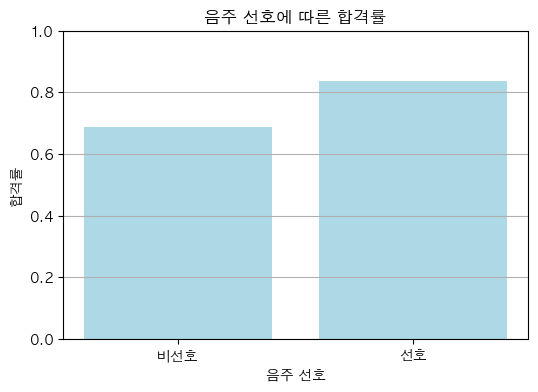

In [76]:
# ÏùåÏ£ºÏÑ†Ìò∏ÎèÑÎ≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•† Í≥ÑÏÇ∞
drink_mean = ie_data.groupby('ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ')['Ìï©Í≤©Ïó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(drink_mean['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'], drink_mean['Ìï©Í≤©Ïó¨Î∂Ä'], color='lightblue')
plt.xlabel('ÏùåÏ£º ÏÑ†Ìò∏')
plt.xticks([0, 1], ['ÎπÑÏÑ†Ìò∏', 'ÏÑ†Ìò∏'])
plt.ylabel('Ìï©Í≤©Î•†')
plt.title('ÏùåÏ£º ÏÑ†Ìò∏Ïóê Îî∞Î•∏ Ìï©Í≤©Î•†')
plt.ylim(0, 1)
plt.grid(True, axis='y')

# ÏùåÏ£º ÏÑ†Ìò∏ÎèÑÍ∞Ä Ï†ïÏàòÌòïÏù¥Î©¥ Ï∂ï Î†àÏù¥Î∏î ÏßÄÏ†ï
if ie_data['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'].nunique() <= 5:
    plt.xticks(drink_mean['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'])

plt.show()

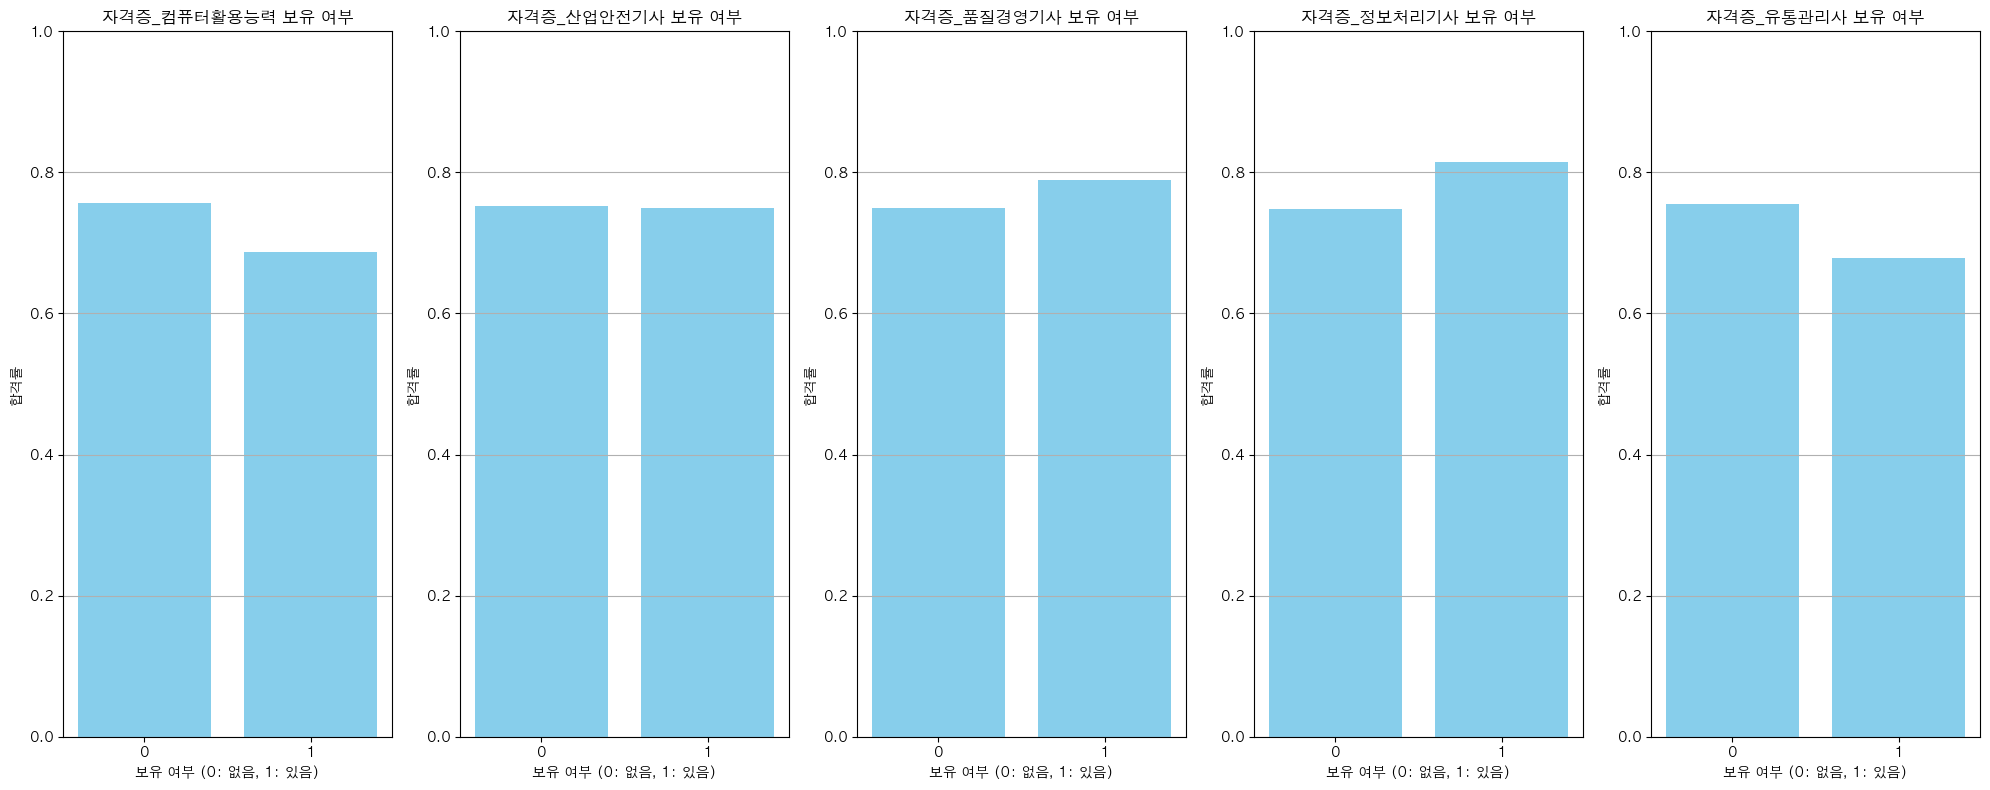

In [78]:
import matplotlib.pyplot as plt

# ÏûêÍ≤©Ï¶ù Ïª¨Îüº Î¶¨Ïä§Ìä∏
cert_columns = [
    'ÏûêÍ≤©Ï¶ù_Ïª¥Ìì®ÌÑ∞ÌôúÏö©Îä•Î†•',
    'ÏûêÍ≤©Ï¶ù_ÏÇ∞ÏóÖÏïàÏ†ÑÍ∏∞ÏÇ¨',
    'ÏûêÍ≤©Ï¶ù_ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨',
    'ÏûêÍ≤©Ï¶ù_Ï†ïÎ≥¥Ï≤òÎ¶¨Í∏∞ÏÇ¨',
    'ÏûêÍ≤©Ï¶ù_Ïú†ÌÜµÍ¥ÄÎ¶¨ÏÇ¨'
]

# ÏãúÍ∞ÅÌôî: Í∞Å ÏûêÍ≤©Ï¶ùÎ≥ÑÎ°ú ÌèâÍ∑† Ìï©Í≤©Î•† Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(cert_columns):
    cert_mean = ie_data.groupby(col)['Ìï©Í≤©Ïó¨Î∂Ä'].mean()
    axes[i].bar(cert_mean.index.astype(str), cert_mean.values, color='skyblue')
    axes[i].set_title(f'{col} Î≥¥Ïú† Ïó¨Î∂Ä')
    axes[i].set_xlabel('Î≥¥Ïú† Ïó¨Î∂Ä (0: ÏóÜÏùå, 1: ÏûàÏùå)')
    axes[i].set_ylabel('Ìï©Í≤©Î•†')
    axes[i].set_ylim(0, 1)
    axes[i].grid(True, axis='y')

plt.tight_layout()
plt.show()

In [80]:
ie_data.columns

Index(['Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥', 'ÏïåÎ∞î Ïó¨Î∂Ä', 'Ïõî ÏÜåÎìù', 'ÏßÅÏû•_ÎßåÏ°±ÎèÑ', 'ÏßÅÏû•_Ï†ÑÍ≥µÏùºÏπòÏ†ïÎèÑ', 'ÏßÅÏû•_ÏöîÍµ¨ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä',
       'Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä', 'Íµ∞Î≥µÎ¨¥Í≤ΩÌóò', 'Ìú¥ÌïôÌïôÍ∏∞Ïàò', 'Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò', 'ÎåÄÌïôÏõêÍ≤ΩÌóò', 'Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò',
       'Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò', 'Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥', 'ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä', 'Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò', 'Í≥µÎ™®Ï†ÑÏàòÏÉÅ', 'ÎåÄÏô∏ÌôúÎèô', 'Î©¥Ï†ëÌõàÎ†®',
       'Ï§ëÏöîÎèÑ_Í∑ºÎ°úÏÜåÎìù', 'Ï§ëÏöîÎèÑ_Ìù•ÎØ∏', 'Ï§ëÏöîÎèÑ_Ï†ÑÍ≥µÍ¥ÄÎ†®ÏÑ±', 'Ï§ëÏöîÎèÑ_Í∞úÏù∏Î∞úÏ†ÑÍ∞ÄÎä•ÏÑ±', 'Ï§ëÏöîÎèÑ_ÏßÅÏóÖÏûêÏ≤¥Ï†ÑÎßù',
       'Ï§ëÏöîÎèÑ_ÏßÅÏû•ÏïàÏ†ïÏÑ±', 'Ï§ëÏöîÎèÑ_Í∑ºÎ¨¥ÌôòÍ≤Ω', 'Ï§ëÏöîÎèÑ_Î≥µÎ¶¨ÌõÑÏÉù', 'Ï§ëÏöîÎèÑ_ÌöåÏÇ¨Í∑úÎ™®', 'Ï§ëÏöîÎèÑ_Ï∂úÌá¥Í∑ºÍ±∞Î¶¨',
       'Ï§ëÏöîÎèÑ_ÏÇ¨ÌöåÏ†ÅÌèâÌåê', 'ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ', 'Ìù°Ïó∞Ïó¨Î∂Ä', 'ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ', 'ÏÇ∂Ïùò ÎßåÏ°±ÎèÑ', 'Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®',
       'ÌòÑÏû¨ Í±¥Í∞ïÏÉÅÌÉú', 'Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä', 'ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê', 'Ìï©Í≤©Ïó¨Î∂Ä', 'ÏûêÍ≤©Ï¶ù_ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨', 'ÏûêÍ≤©Ï

In [82]:
# Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï
y = ie_data['Ìï©Í≤©Ïó¨Î∂Ä']

# ÎèÖÎ¶ΩÎ≥ÄÏàò ÏÑ§Ï†ï (ÏßÅÏû•Ïù∏ ÎåÄÏÉÅÏúºÎ°ú ÏßÑÌñâÌïú ÏÑ§Î¨∏ Í≤∞Í≥ºÎäî Ï†úÏô∏, Ï¢ÖÏÜçÎ≥ÄÏàòÏôÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ïó∞Í¥Ä ÎêòÏñ¥ÏûàÎäî Î≥ÄÏàòÎì§ Ï†úÍ±∞)
X = ie_data.drop(columns=['ÏïåÎ∞î Ïó¨Î∂Ä','Ìï©Í≤©Ïó¨Î∂Ä',
                          'Ïõî ÏÜåÎìù','ÏßÅÏû•_ÎßåÏ°±ÎèÑ', 'ÏßÅÏû•_Ï†ÑÍ≥µÏùºÏπòÏ†ïÎèÑ', 'ÏßÅÏû•_ÏöîÍµ¨ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä',
                         'Ï§ëÏöîÎèÑ_Í∑ºÎ°úÏÜåÎìù', 'Ï§ëÏöîÎèÑ_Ìù•ÎØ∏', 'Ï§ëÏöîÎèÑ_Ï†ÑÍ≥µÍ¥ÄÎ†®ÏÑ±', 'Ï§ëÏöîÎèÑ_Í∞úÏù∏Î∞úÏ†ÑÍ∞ÄÎä•ÏÑ±',
       'Ï§ëÏöîÎèÑ_ÏßÅÏóÖÏûêÏ≤¥Ï†ÑÎßù', 'Ï§ëÏöîÎèÑ_ÏßÅÏû•ÏïàÏ†ïÏÑ±', 'Ï§ëÏöîÎèÑ_Í∑ºÎ¨¥ÌôòÍ≤Ω', 'Ï§ëÏöîÎèÑ_Î≥µÎ¶¨ÌõÑÏÉù', 'Ï§ëÏöîÎèÑ_ÌöåÏÇ¨Í∑úÎ™®',
       'Ï§ëÏöîÎèÑ_Ï∂úÌá¥Í∑ºÍ±∞Î¶¨', 'Ï§ëÏöîÎèÑ_ÏÇ¨ÌöåÏ†ÅÌèâÌåê'])

In [84]:
# ÏµúÏ¢Ö Î≥ÄÏàò ÌôïÏù∏
X.columns

Index(['Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥', 'Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä', 'Íµ∞Î≥µÎ¨¥Í≤ΩÌóò', 'Ìú¥ÌïôÌïôÍ∏∞Ïàò', 'Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò', 'ÎåÄÌïôÏõêÍ≤ΩÌóò',
       'Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò', 'Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò', 'Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥', 'ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä', 'Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò', 'Í≥µÎ™®Ï†ÑÏàòÏÉÅ', 'ÎåÄÏô∏ÌôúÎèô',
       'Î©¥Ï†ëÌõàÎ†®', 'ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ', 'Ìù°Ïó∞Ïó¨Î∂Ä', 'ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ', 'ÏÇ∂Ïùò ÎßåÏ°±ÎèÑ', 'Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®', 'ÌòÑÏû¨ Í±¥Í∞ïÏÉÅÌÉú',
       'Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä', 'ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê', 'ÏûêÍ≤©Ï¶ù_ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨', 'ÏûêÍ≤©Ï¶ù_Ï†ïÎ≥¥Ï≤òÎ¶¨Í∏∞ÏÇ¨', 'ÏûêÍ≤©Ï¶ù_Ïª¥Ìì®ÌÑ∞ÌôúÏö©Îä•Î†•',
       'ÏûêÍ≤©Ï¶ù_ÏÇ∞ÏóÖÏïàÏ†ÑÍ∏∞ÏÇ¨', 'ÏûêÍ≤©Ï¶ù_Ïú†ÌÜµÍ¥ÄÎ¶¨ÏÇ¨'],
      dtype='object')

## Decision Tree (Î≤†Ïù¥Ïä§Î™®Îç∏)

In [79]:
### Î≤†Ïù¥Ïä§ÎùºÏù∏ÏùÑ Ïû°Í∏∞ ÏúÑÌïú ÎîîÏãúÏ†ÑÌä∏Î¶¨ Î∂ÑÏÑù ÏßÑÌñâ
### Í∑∏ÎûòÎèÑ GridSearchÎ•º ÌÜµÌï¥ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏïÑ ÏßÑÌñâ

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score
# import pandas as pd
# import numpy as np

# # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥ Î¶¨Ïä§Ìä∏
# max_depth_list = [4,5,6,7,8,9,10,None]
# min_samples_split_list = [2,3,4,5,6,7,8,9,10]
# min_samples_leaf_list = [1,2,3,4,5,6,7,8,9,10]

# # Stratified K-Fold
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# results = []

# for max_depth in max_depth_list:
#     for min_samples_split in min_samples_split_list:
#         for min_samples_leaf in min_samples_leaf_list:
            
#             train_acc_list = []
#             valid_acc_list = []
            
#             for train_idx, valid_idx in skf.split(X, y):
#                 X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
#                 y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
                
#                 model = DecisionTreeClassifier(
#                     max_depth=max_depth,
#                     min_samples_split=min_samples_split,
#                     min_samples_leaf=min_samples_leaf,
#                     random_state=42
#                 )
#                 model.fit(X_train, y_train)
                
#                 train_pred = model.predict(X_train)
#                 valid_pred = model.predict(X_valid)
                
#                 train_acc_list.append(accuracy_score(y_train, train_pred))
#                 valid_acc_list.append(accuracy_score(y_valid, valid_pred))
            
#             results.append({
#                 'max_depth': max_depth,
#                 'min_samples_split': min_samples_split,
#                 'min_samples_leaf': min_samples_leaf,
#                 'train_accuracy_mean': np.mean(train_acc_list),
#                 'valid_accuracy_mean': np.mean(valid_acc_list)
#             })

# results_df = pd.DataFrame(results)
# results_df = results_df.sort_values(by='valid_accuracy_mean', ascending=False).reset_index(drop=True)

# print(results_df)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dt_final = DecisionTreeClassifier(max_depth=5,min_samples_split=10,min_samples_leaf=2
                                      ,random_state=42)
dt_final.fit(X, y)

y_pred = dt_final.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

#Ï§ëÏöîÎèÑ ÏÉÅÏúÑ 10Í∞ú
feat_imp_df = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_final.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feat_imp_df.head(30))

Accuracy: 0.8208430913348946

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.38      0.51       211
           1       0.83      0.97      0.89       643

    accuracy                           0.82       854
   macro avg       0.81      0.67      0.70       854
weighted avg       0.82      0.82      0.80       854

        feature  importance
6         ÎåÄÌïôÏõêÍ≤ΩÌóò    0.312010
22      ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê    0.179846
17        ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ    0.120403
15     ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ    0.097682
4         Ìú¥ÌïôÌïôÍ∏∞Ïàò    0.060414
7       Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò    0.055884
0        Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥    0.035638
14         Î©¥Ï†ëÌõàÎ†®    0.035242
20      ÌòÑÏû¨ Í±¥Í∞ïÏÉÅÌÉú    0.031171
21        Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä    0.028187
19      Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®    0.022518
11       Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò    0.021007
8        Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò    0.000000
26   ÏûêÍ≤©Ï¶ù_ÏÇ∞ÏóÖÏïàÏ†ÑÍ∏∞ÏÇ¨    0.000000
25  ÏûêÍ≤©Ï¶ù_Ïª¥Ìì®ÌÑ∞ÌôúÏö©

## ÏúÑÎäî ÌïòÎÇòÏùò ÎîîÏãúÏ†ÑÌä∏Î¶¨Î°ú ÏßÑÌñâÌïú Í≤∞Í≥ºÏù¥Îã§.
## Î∞ëÏóî Ïó¨Îü¨ ÎîîÏãúÏ†ÑÌä∏Î¶¨Î°ú Îã§ÏñëÌïú Î≥ÄÏàòÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Î•º Ïù¥Ïö©ÌïòÏòÄÎã§.

### RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# ÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥ Ï†ïÏùò
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],                  # Ìä∏Î¶¨ Í∞úÏàò
    'max_depth': [None, 5, 10, 15, 20, 30],                    # Ìä∏Î¶¨ ÏµúÎåÄ ÍπäÏù¥
    'min_samples_split': [2, 5, 10, 15],                       # ÎÇ¥Î∂Ä ÎÖ∏Îìú Î∂ÑÌï† ÏµúÏÜå ÏÉòÌîå Ïàò
    'min_samples_leaf': [1, 2, 4, 6],                          # Î¶¨ÌîÑ ÎÖ∏Îìú ÏµúÏÜå ÏÉòÌîå Ïàò
    'criterion': ['gini', 'entropy', 'log_loss'],             # Î∂ÑÌï† Í∏∞Ï§Ä
}

# Î™®Îç∏Í≥º GridSearchCV Ï†ïÏùò
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold ÍµêÏ∞®Í≤ÄÏ¶ù
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# ÌïôÏäµ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("üéØ ÏµúÏ†Å ÍµêÏ∞®Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:", grid_search.best_score_)

# ÏµúÏ†Å Î™®Îç∏Î°ú ÌÖåÏä§Ìä∏ÏÖã ÌèâÍ∞Ä
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
üéØ ÏµúÏ†Å ÍµêÏ∞®Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.7760090167453843


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÏÉùÏÑ±
best_model = RandomForestClassifier(
    class_weight=None,
    criterion='entropy',
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=50,
    random_state=42
)

# ÌïôÏäµ
best_model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test)

print("‚úÖ Ï†ïÌôïÎèÑ:", accuracy_score(y_test, y_pred))

‚úÖ Ï†ïÌôïÎèÑ: 0.7777777777777778


        Feature  Importance
22      ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê    0.133280
6         ÎåÄÌïôÏõêÍ≤ΩÌóò    0.103087
0        Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥    0.091742
19      Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®    0.073212
15     ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ    0.069978
4         Ìú¥ÌïôÌïôÍ∏∞Ïàò    0.069208
18       ÏÇ∂Ïùò ÎßåÏ°±ÎèÑ    0.057734
20      ÌòÑÏû¨ Í±¥Í∞ïÏÉÅÌÉú    0.048751
17        ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ    0.047207
11       Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò    0.026854
16         Ìù°Ïó∞Ïó¨Î∂Ä    0.021840
7       Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò    0.021777
10        ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä    0.020908
21        Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä    0.020711
9        Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥    0.020245
14         Î©¥Ï†ëÌõàÎ†®    0.019031
5        Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò    0.018840
3         Íµ∞Î≥µÎ¨¥Í≤ΩÌóò    0.016471
12        Í≥µÎ™®Ï†ÑÏàòÏÉÅ    0.015132
13         ÎåÄÏô∏ÌôúÎèô    0.013698
8        Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò    0.013385
27    ÏûêÍ≤©Ï¶ù_Ïú†ÌÜµÍ¥ÄÎ¶¨ÏÇ¨    0.012122
26   ÏûêÍ≤©Ï¶ù_ÏÇ∞ÏóÖÏïàÏ†ÑÍ∏∞ÏÇ¨    0.011798
23   ÏûêÍ≤©Ï¶ù_ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨    0.011624
24   ÏûêÍ≤©Ï¶ù_Ï

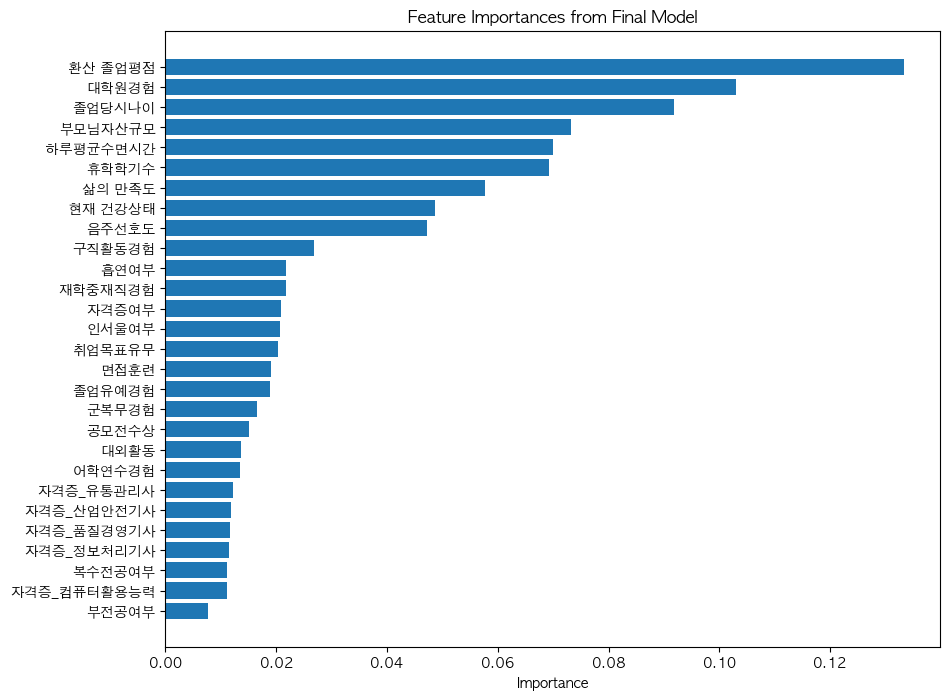

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')  # Îß•ÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

# ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ
final_model = RandomForestClassifier(
    class_weight=None,
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)
final_model.fit(X, y)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ

# Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = final_model.feature_importances_
feature_names = X.columns

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ≥† Ï§ëÏöîÎèÑ Ïàú Ï†ïÎ†¨
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
 
# Ï∂úÎ†•
print(importance_df)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Ï§ëÏöîÎèÑ ÎÜíÏùÄ Î≥ÄÏàò ÏúÑÎ°ú
plt.xlabel('Importance')
plt.title('Feature Importances from Final Model')
plt.show()

## SHAPÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÏàò ÏòÅÌñ• ÌôïÏù∏

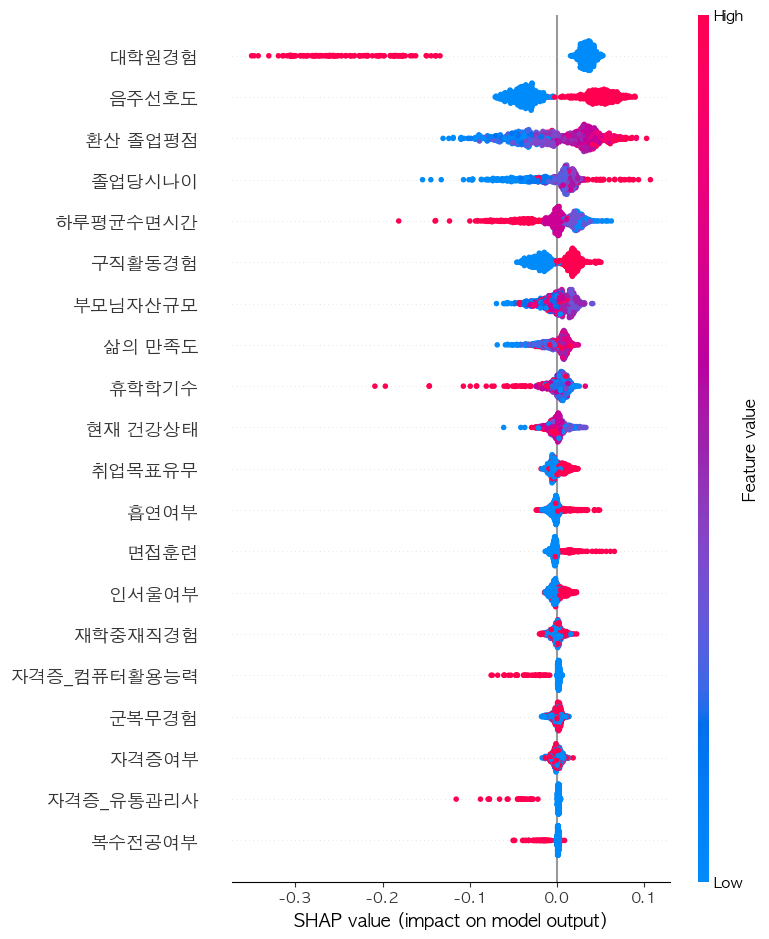

In [92]:
import shap

# TreeExplainer ÏÇ¨Ïö© (RandomForestÏóê Ï†ÅÌï©)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X)  # Ï†ÑÏ≤¥ ÏÉòÌîåÏóê ÎåÄÌï¥ SHAP Í∞í Í≥ÑÏÇ∞

# shap_values ÌäπÏßï Ïàò
num_features = shap_values.shape[1]  # 29

# XÏóêÏÑú Ï≤òÏùå 29Í∞ú Ïª¨ÎüºÎßå Ï∂îÏ∂ú (Ï†ïÌôïÌïú Ïª¨ÎüºÏùÑ ÏïåÍ≥† Ïã∂ÏúºÎ©¥ Îî∞Î°ú ÌôïÏù∏ ÌïÑÏöî)
X_subset = X.iloc[:, :num_features]

# ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú shap Í∞íÏúºÎ°ú summary plot Í∑∏Î¶¨Í∏∞
shap.summary_plot(shap_values[:, :, 1], X_subset)

# ÏÇ∞Í≥µ Ï°∏ÏóÖ Ï†ïÍ∑úÏßÅ Ï∑®ÏóÖÏûêÎì§ Í≥†Ïó∞Î¥â/Ï†ÄÏó∞Î¥â ÏòàÏ∏°

In [94]:
# ÏïåÎ∞î Ïó¨Î∂Ä Î≥ÄÏàòÎ°ú Ï†ïÍ∑úÏßÅ Ï∑®ÏóÖÏûê Íµ¨Î∂Ñ
ie_ft,ie_pt = ie_data[ie_data['ÏïåÎ∞î Ïó¨Î∂Ä']==False], ie_data[ie_data['ÏïåÎ∞î Ïó¨Î∂Ä']==True]

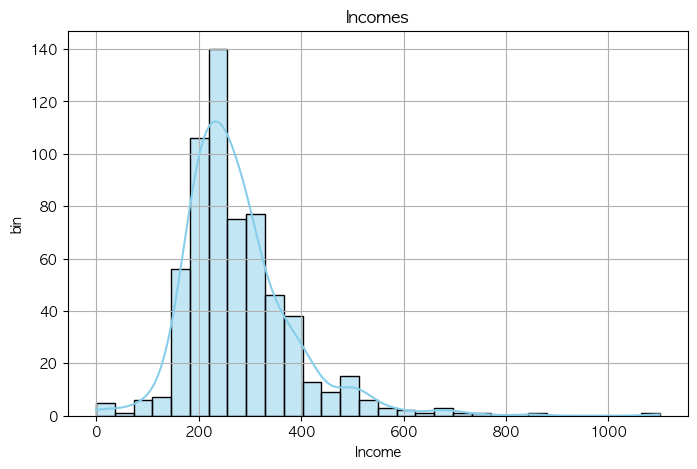

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏõîÏÜåÎìù ÌûàÏä§ÌÜ†Í∑∏Îû®

plt.figure(figsize=(8, 5))
sns.histplot(ie_ft['Ïõî ÏÜåÎìù'], bins=30, kde=True, color='skyblue')
plt.title('Incomes')
plt.xlabel('Income')
plt.ylabel('bin')
plt.grid(True)
plt.show()

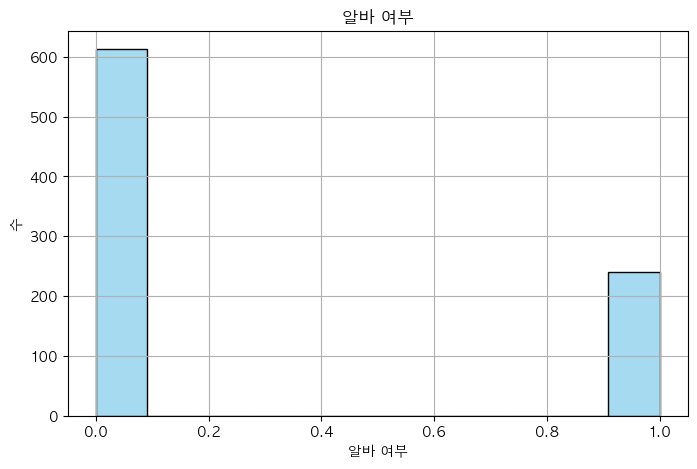

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ï†ïÍ∑úÏßÅ/ÎπÑÏ†ïÍ∑úÏßÅ ÎπÑÏú® ÌôïÏù∏

plt.figure(figsize=(8, 5))
sns.histplot(ie_data['ÏïåÎ∞î Ïó¨Î∂Ä'],color='skyblue')
plt.title('ÏïåÎ∞î Ïó¨Î∂Ä')
plt.xlabel('ÏïåÎ∞î Ïó¨Î∂Ä')
plt.ylabel('Ïàò')
plt.grid(True)
plt.show()

### ÏõîÏÜåÎìù 300 Ïù¥ÏÉÅÏùÑ Í≥†Ïó∞Î¥âÏúºÎ°ú Íµ¨Î∂Ñ

In [102]:
ie_ft['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'] = (ie_ft['Ïõî ÏÜåÎìù'] >= 300).astype(int)

/var/folders/d2/9rzglf1n68j37h1zk5c5zvkw0000gn/T/ipykernel_14425/1134431696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ie_ft['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'] = (ie_ft['Ïõî ÏÜåÎìù'] >= 300).astype(int)


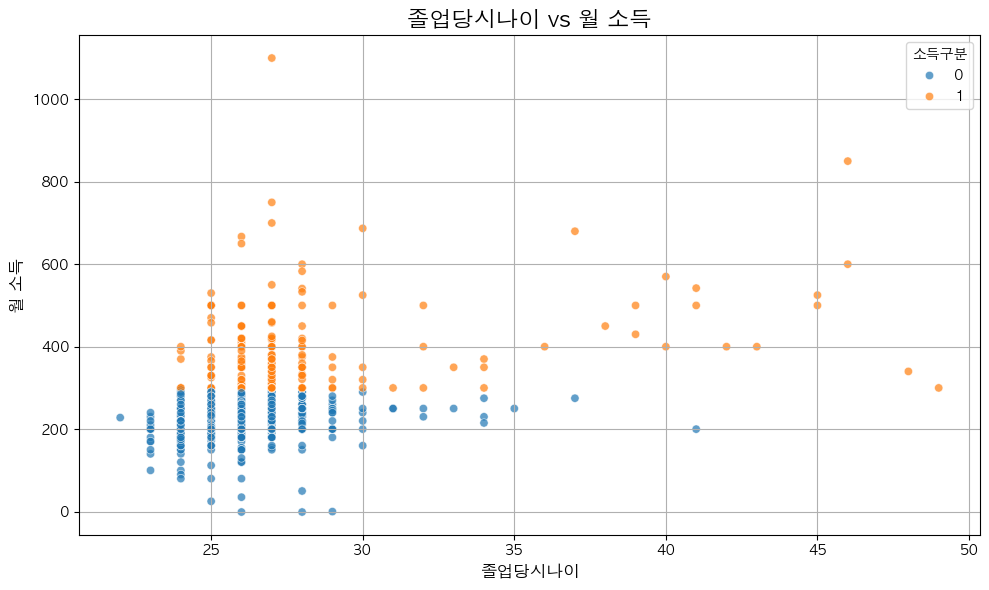

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ie_ft, x='Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥', y='Ïõî ÏÜåÎìù', hue='Í≥†Ïó∞Î¥âÏó¨Î∂Ä', alpha=0.7)

plt.title('Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥ vs Ïõî ÏÜåÎìù', fontsize=16)
plt.xlabel('Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥', fontsize=12)
plt.ylabel('Ïõî ÏÜåÎìù', fontsize=12)
plt.grid(True)
plt.legend(title='ÏÜåÎìùÍµ¨Î∂Ñ')
plt.tight_layout()
plt.show()

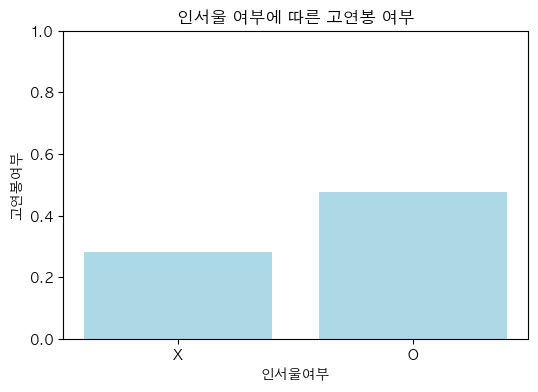

In [110]:
# Ïù∏ÏÑúÏö∏ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í≥†Ïó∞Î¥â Ïó¨Î∂Ä
aca_mean = ie_ft.groupby('Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä')['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(aca_mean['Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä'], aca_mean['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'], color='lightblue')
plt.xticks([0, 1], ['X', 'O'])
plt.xlabel('Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä')
plt.ylabel('Í≥†Ïó∞Î¥âÏó¨Î∂Ä')
plt.title('Ïù∏ÏÑúÏö∏ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í≥†Ïó∞Î¥â Ïó¨Î∂Ä')
plt.ylim(0, 1)
plt.show()

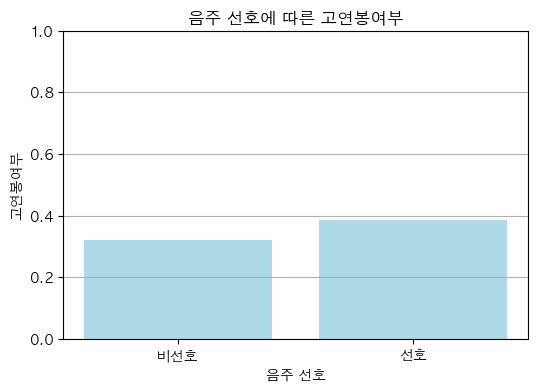

In [112]:
# ÏùåÏ£ºÏÑ†Ìò∏ÎèÑÎ≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•† Í≥ÑÏÇ∞
drink_mean = ie_ft.groupby('ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ')['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(drink_mean['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'], drink_mean['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'], color='lightblue')
plt.xlabel('ÏùåÏ£º ÏÑ†Ìò∏')
plt.xticks([0, 1], ['ÎπÑÏÑ†Ìò∏', 'ÏÑ†Ìò∏'])
plt.ylabel('Í≥†Ïó∞Î¥âÏó¨Î∂Ä')
plt.title('ÏùåÏ£º ÏÑ†Ìò∏Ïóê Îî∞Î•∏ Í≥†Ïó∞Î¥âÏó¨Î∂Ä')
plt.ylim(0, 1)
plt.grid(True, axis='y')

# ÏùåÏ£º ÏÑ†Ìò∏ÎèÑÍ∞Ä Ï†ïÏàòÌòïÏù¥Î©¥ Ï∂ï Î†àÏù¥Î∏î ÏßÄÏ†ï
if ie_data['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'].nunique() <= 5:
    plt.xticks(drink_mean['ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ'])

plt.show()

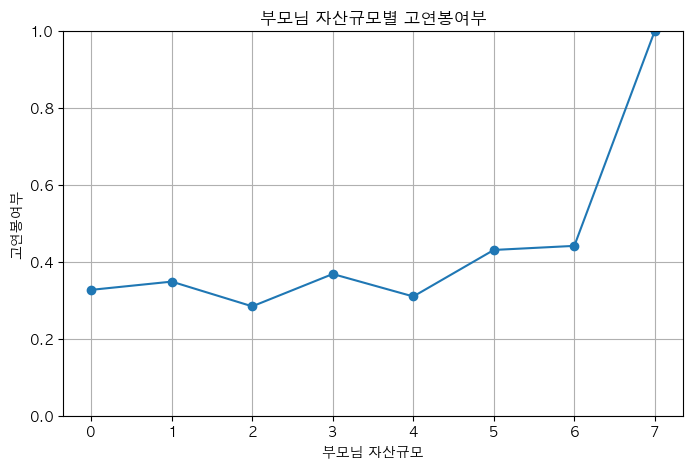

In [114]:
# ÎÇòÏù¥Î≥Ñ ÌèâÍ∑† Ìï©Í≤©Î•†
age_mean = ie_ft.groupby('Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®')['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(age_mean['Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®'], age_mean['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'], marker='o')
plt.xlabel('Î∂ÄÎ™®Îãò ÏûêÏÇ∞Í∑úÎ™®')
plt.ylabel('Í≥†Ïó∞Î¥âÏó¨Î∂Ä')
plt.title('Î∂ÄÎ™®Îãò ÏûêÏÇ∞Í∑úÎ™®Î≥Ñ Í≥†Ïó∞Î¥âÏó¨Î∂Ä')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

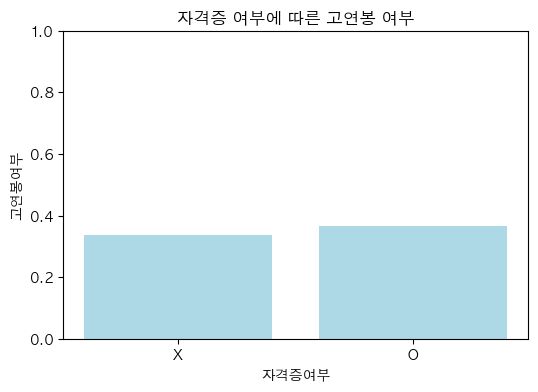

In [116]:
# Ïù∏ÏÑúÏö∏ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í≥†Ïó∞Î¥â Ïó¨Î∂Ä
aca_mean = ie_ft.groupby('ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä')['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(aca_mean['ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä'], aca_mean['Í≥†Ïó∞Î¥âÏó¨Î∂Ä'], color='lightblue')
plt.xticks([0, 1], ['X', 'O'])
plt.xlabel('ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä')
plt.ylabel('Í≥†Ïó∞Î¥âÏó¨Î∂Ä')
plt.title('ÏûêÍ≤©Ï¶ù Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í≥†Ïó∞Î¥â Ïó¨Î∂Ä')
plt.ylim(0, 1)
plt.show()

In [106]:
X=ie_ft.copy()

In [118]:
# Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Í≥†Ïó∞Î¥â Ïó¨Î∂ÄÎ°ú ÏÑ§Ï†ï
y = X['Í≥†Ïó∞Î¥âÏó¨Î∂Ä']

# ÌïÑÏöîÏóÜÍ±∞ÎÇò Ï¢ÖÏÜçÎ≥ÄÏàòÏôÄ ÏßÅÏ†ëÏ†ÅÏù∏ ÏòÅÌñ•Ïù¥ ÏûàÎäî Î≥ÄÏàò Ï†úÍ±∞
X = X.drop(columns=['Í≥†Ïó∞Î¥âÏó¨Î∂Ä','Ïõî ÏÜåÎìù','ÏïåÎ∞î Ïó¨Î∂Ä','Ìï©Í≤©Ïó¨Î∂Ä','ÏßÅÏû•_ÎßåÏ°±ÎèÑ','Ï§ëÏöîÎèÑ_Í∑ºÎ°úÏÜåÎìù'])

In [120]:
# ÏµúÏ¢Ö Î≥ÄÏàò ÌôïÏù∏
X.columns

Index(['Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥', 'ÏßÅÏû•_Ï†ÑÍ≥µÏùºÏπòÏ†ïÎèÑ', 'ÏßÅÏû•_ÏöîÍµ¨ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä', 'Î≥µÏàòÏ†ÑÍ≥µÏó¨Î∂Ä', 'Î∂ÄÏ†ÑÍ≥µÏó¨Î∂Ä', 'Íµ∞Î≥µÎ¨¥Í≤ΩÌóò',
       'Ìú¥ÌïôÌïôÍ∏∞Ïàò', 'Ï°∏ÏóÖÏú†ÏòàÍ≤ΩÌóò', 'ÎåÄÌïôÏõêÍ≤ΩÌóò', 'Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò', 'Ïñ¥ÌïôÏó∞ÏàòÍ≤ΩÌóò', 'Ï∑®ÏóÖÎ™©ÌëúÏú†Î¨¥', 'ÏûêÍ≤©Ï¶ùÏó¨Î∂Ä',
       'Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò', 'Í≥µÎ™®Ï†ÑÏàòÏÉÅ', 'ÎåÄÏô∏ÌôúÎèô', 'Î©¥Ï†ëÌõàÎ†®', 'Ï§ëÏöîÎèÑ_Ìù•ÎØ∏', 'Ï§ëÏöîÎèÑ_Ï†ÑÍ≥µÍ¥ÄÎ†®ÏÑ±', 'Ï§ëÏöîÎèÑ_Í∞úÏù∏Î∞úÏ†ÑÍ∞ÄÎä•ÏÑ±',
       'Ï§ëÏöîÎèÑ_ÏßÅÏóÖÏûêÏ≤¥Ï†ÑÎßù', 'Ï§ëÏöîÎèÑ_ÏßÅÏû•ÏïàÏ†ïÏÑ±', 'Ï§ëÏöîÎèÑ_Í∑ºÎ¨¥ÌôòÍ≤Ω', 'Ï§ëÏöîÎèÑ_Î≥µÎ¶¨ÌõÑÏÉù', 'Ï§ëÏöîÎèÑ_ÌöåÏÇ¨Í∑úÎ™®',
       'Ï§ëÏöîÎèÑ_Ï∂úÌá¥Í∑ºÍ±∞Î¶¨', 'Ï§ëÏöîÎèÑ_ÏÇ¨ÌöåÏ†ÅÌèâÌåê', 'ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ', 'Ìù°Ïó∞Ïó¨Î∂Ä', 'ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ', 'ÏÇ∂Ïùò ÎßåÏ°±ÎèÑ',
       'Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®', 'ÌòÑÏû¨ Í±¥Í∞ïÏÉÅÌÉú', 'Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä', 'ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê', 'ÏûêÍ≤©Ï¶ù_ÌíàÏßàÍ≤ΩÏòÅÍ∏∞ÏÇ¨', 'ÏûêÍ≤©Ï¶ù_Ï†ïÎ≥¥Ï≤òÎ¶¨Í∏∞ÏÇ¨',
       'ÏûêÍ≤©Ï¶ù_Ïª¥Ìì®ÌÑ∞ÌôúÏö©Îä•Î†•', 'ÏûêÍ≤©Ï¶ù_ÏÇ∞ÏóÖÏïàÏ†ÑÍ∏∞ÏÇ¨', 'Ï

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# ÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥ Ï†ïÏùò
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],                  # Ìä∏Î¶¨ Í∞úÏàò
    'max_depth': [None, 5, 10, 15, 20, 30],                    # Ìä∏Î¶¨ ÏµúÎåÄ ÍπäÏù¥
    'min_samples_split': [2, 5, 10, 15],                       # ÎÇ¥Î∂Ä ÎÖ∏Îìú Î∂ÑÌï† ÏµúÏÜå ÏÉòÌîå Ïàò
    'min_samples_leaf': [1, 2, 4, 6],                          # Î¶¨ÌîÑ ÎÖ∏Îìú ÏµúÏÜå ÏÉòÌîå Ïàò
    'criterion': ['gini', 'entropy', 'log_loss'],             # Î∂ÑÌï† Í∏∞Ï§Ä
}

# Î™®Îç∏Í≥º GridSearchCV Ï†ïÏùò
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold ÍµêÏ∞®Í≤ÄÏ¶ù
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# ÌïôÏäµ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("üéØ ÏµúÏ†Å ÍµêÏ∞®Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:", grid_search.best_score_)

# ÏµúÏ†Å Î™®Îç∏Î°ú ÌÖåÏä§Ìä∏ÏÖã ÌèâÍ∞Ä
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
üéØ ÏµúÏ†Å ÍµêÏ∞®Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.6714285714285715


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÏÉùÏÑ±
best_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

# ÌïôÏäµ
best_model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test)

print("‚úÖ Ï†ïÌôïÎèÑ:", accuracy_score(y_test, y_pred))

‚úÖ Ï†ïÌôïÎèÑ: 0.6991869918699187


        Feature  Importance
0        Ï°∏ÏóÖÎãπÏãúÎÇòÏù¥    0.095639
34      ÌôòÏÇ∞ Ï°∏ÏóÖÌèâÏ†ê    0.082124
31      Î∂ÄÎ™®ÎãòÏûêÏÇ∞Í∑úÎ™®    0.053707
6         Ìú¥ÌïôÌïôÍ∏∞Ïàò    0.047751
30       ÏÇ∂Ïùò ÎßåÏ°±ÎèÑ    0.043443
1     ÏßÅÏû•_Ï†ÑÍ≥µÏùºÏπòÏ†ïÎèÑ    0.042930
27     ÌïòÎ£®ÌèâÍ∑†ÏàòÎ©¥ÏãúÍ∞Ñ    0.041834
33        Ïù∏ÏÑúÏö∏Ïó¨Î∂Ä    0.041695
24     Ï§ëÏöîÎèÑ_ÌöåÏÇ¨Í∑úÎ™®    0.037003
25    Ï§ëÏöîÎèÑ_Ï∂úÌá¥Í∑ºÍ±∞Î¶¨    0.035330
26    Ï§ëÏöîÎèÑ_ÏÇ¨ÌöåÏ†ÅÌèâÌåê    0.034083
32      ÌòÑÏû¨ Í±¥Í∞ïÏÉÅÌÉú    0.032065
18    Ï§ëÏöîÎèÑ_Ï†ÑÍ≥µÍ¥ÄÎ†®ÏÑ±    0.028977
5         Íµ∞Î≥µÎ¨¥Í≤ΩÌóò    0.027917
17       Ï§ëÏöîÎèÑ_Ìù•ÎØ∏    0.026658
21    Ï§ëÏöîÎèÑ_ÏßÅÏû•ÏïàÏ†ïÏÑ±    0.025463
23     Ï§ëÏöîÎèÑ_Î≥µÎ¶¨ÌõÑÏÉù    0.023529
20   Ï§ëÏöîÎèÑ_ÏßÅÏóÖÏûêÏ≤¥Ï†ÑÎßù    0.022056
22     Ï§ëÏöîÎèÑ_Í∑ºÎ¨¥ÌôòÍ≤Ω    0.021992
13       Íµ¨ÏßÅÌôúÎèôÍ≤ΩÌóò    0.020225
19  Ï§ëÏöîÎèÑ_Í∞úÏù∏Î∞úÏ†ÑÍ∞ÄÎä•ÏÑ±    0.019242
29        ÏùåÏ£ºÏÑ†Ìò∏ÎèÑ    0.018795
9       Ïû¨ÌïôÏ§ëÏû¨ÏßÅÍ≤ΩÌóò    0.017144
12        ÏûêÍ≤©

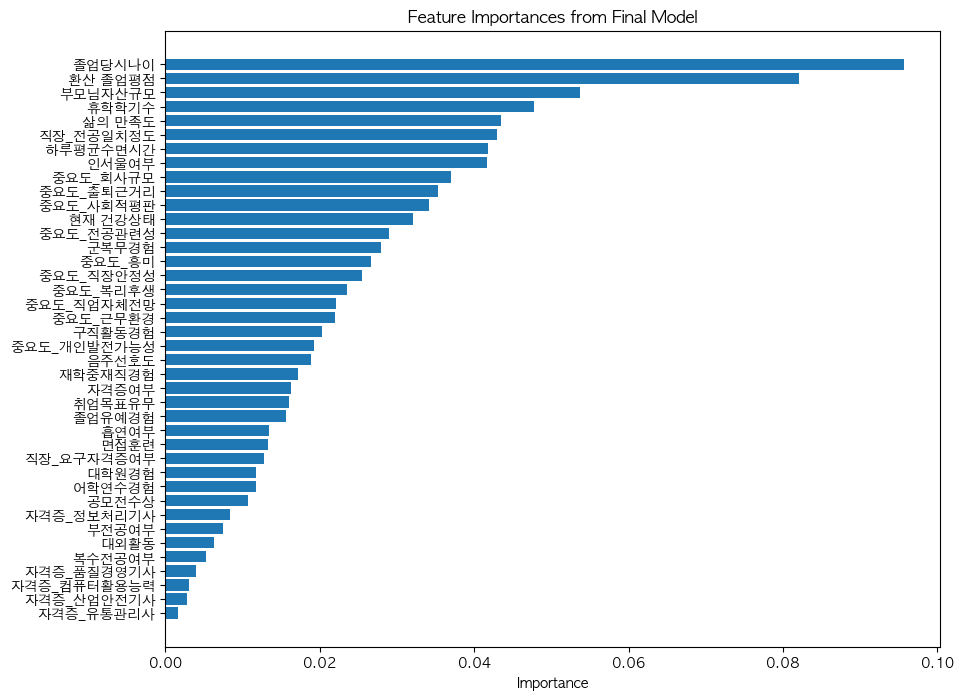

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ (Ïù¥ÎØ∏ ÌïòÏÖ®Îã§Î©¥ ÏÉùÎûµ Í∞ÄÎä•)
final_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)
final_model.fit(X, y)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ

# Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = final_model.feature_importances_
feature_names = X.columns

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ≥† Ï§ëÏöîÎèÑ Ïàú Ï†ïÎ†¨
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
 
# Ï∂úÎ†•
print(importance_df)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Ï§ëÏöîÎèÑ ÎÜíÏùÄ Î≥ÄÏàò ÏúÑÎ°ú
plt.xlabel('Importance')
plt.title('Feature Importances from Final Model')
plt.show()


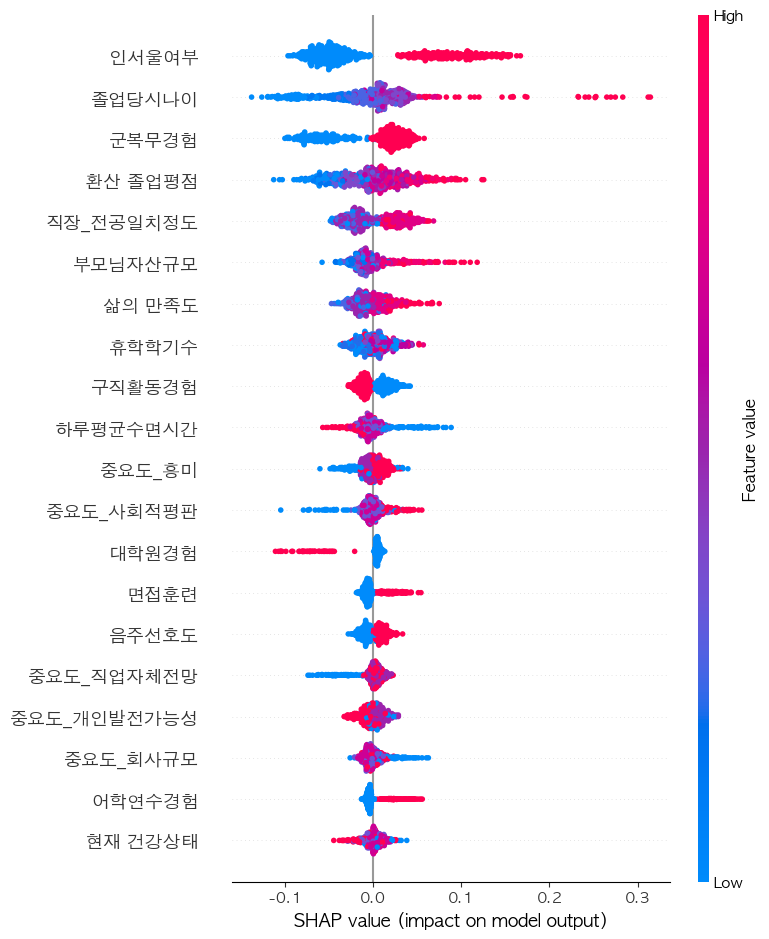

In [132]:
import shap

# TreeExplainer ÏÇ¨Ïö© (RandomForestÏóê Ï†ÅÌï©)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X)  # Ï†ÑÏ≤¥ ÏÉòÌîåÏóê ÎåÄÌï¥ SHAP Í∞í Í≥ÑÏÇ∞

# shap_values ÌäπÏßï Ïàò
num_features = shap_values.shape[1]  # 29

# XÏóêÏÑú Ï≤òÏùå 29Í∞ú Ïª¨ÎüºÎßå Ï∂îÏ∂ú (Ï†ïÌôïÌïú Ïª¨ÎüºÏùÑ ÏïåÍ≥† Ïã∂ÏúºÎ©¥ Îî∞Î°ú ÌôïÏù∏ ÌïÑÏöî)
X_subset = X.iloc[:, :num_features]

# ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú shap Í∞íÏúºÎ°ú summary plot Í∑∏Î¶¨Í∏∞
shap.summary_plot(shap_values[:, :, 1], X_subset)